# WSI 24L
## Ćwiczenie 1 - przeszukiwanie funkcji metodą gradientu prostego w celu znalezienia jej minimum
### Igor Szabłowski

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from time import perf_counter
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

EPS=1e-8

### Implementacja algorytmu gradientu prostego
Algorytm ten został zaimplementowany jako metoda ze stałym krokiem (parametr beta). Warunkiem stopu algorytmu jest wartość gradientu funkcji w aktualnym położeniu równa zero, ponieważ wiemy że gradient zeruje się w minimach funkcji. W przypadku tej implementacji, ze względu na błąd maszynowy, przyjmuję wartość eps od której uznaje znalezienie minimum.

In [2]:
class GradientDescent:

    def _show_data(fun):
        def show_data_wrapper(*args, **kwargs):
            start_time = perf_counter()
            minimum, x, it = fun(*args, **kwargs)
            end_time = perf_counter()
            exec_time = end_time - start_time
            if kwargs.get('show_data', False):
                print(f'Found minimum at:')
                print(''.join([f'x{i+1} = {value}\n' for i, value in enumerate(x)]), end='')
                print(f'Minimum value: {minimum}')
                print(f'Iterations: {it}')
                print(f'Execution time: {exec_time}')
                print('-----------------------')
            return minimum, x, it
        return show_data_wrapper

    @staticmethod
    @_show_data
    def solve(fun, gradient, eps, beta, *args, **kwargs):
        it = 0
        x = np.array(args)
        gradient_value = np.array(gradient(*x))
        if not gradient_value.ndim: gradient_value = np.array([gradient_value])
        while any(abs(value) >= eps for value in gradient_value):
            it+=1
            x = x - beta*gradient_value
            gradient_value = np.array(gradient(*x))
            if not gradient_value.ndim: gradient_value = np.array([gradient_value])
        return fun(*x), x, it


Wybrany algorytm został zastosowany w celu znalezienia minimum zadanych funkcj: $f(x)$ - jednowymiarowej, oraz $g(x)$ - dwuwymiarowej.\
Poniżej przedstawione są także wyniki przykładowego wywołania algorytmu dla obu funkcji.

In [3]:
f = lambda x: 2*x**2 + 3*x -1
gradient_f = lambda x: 4*x + 3

g = lambda x1, x2: 1 - 0.6*np.exp(-x1**2 - x2**2) - 0.4*np.exp(-(x1 + 1.75)**2 - (x2-1)**2)
gradient_g = lambda x1, x2: (1.2*x1*np.exp(-x1**2 - x2**2) + 0.8*(x1 + 1.75)*np.exp(-(x1 + 1.75)**2 - (x2 -1)**2),
                             1.2*x2*np.exp(-x1**2 - x2**2) + 0.8*(x2 -1)*np.exp(-(x1 + 1.75)**2 - (x2 -1)**2))

GradientDescent.solve(g, gradient_g, EPS, 0.25, 1, 2, show_data=True);
GradientDescent.solve(f, gradient_f, EPS, 0.25, 100, show_data=True);


Found minimum at:
x1 = -0.0219482485387179
x2 = 0.012541864210954214
Minimum value: 0.3927674684103985
Iterations: 119
Execution time: 0.0012971319993084762
-----------------------
Found minimum at:
x1 = -0.75
Minimum value: -2.125
Iterations: 1
Execution time: 5.568499909713864e-05
-----------------------


#### Wykres funkcji $f(x)$ wraz ze znalezionym minimum

Found minimum at:
x1 = -0.75
Minimum value: -2.125
Iterations: 1
Execution time: 3.926299905288033e-05
-----------------------


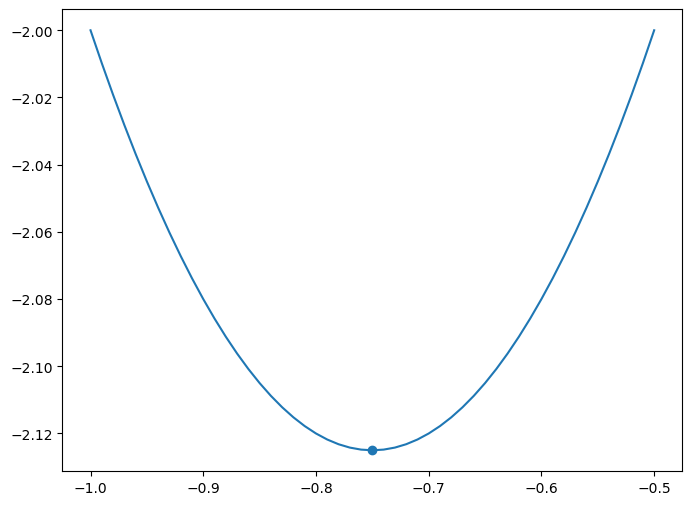

In [4]:
x_axis = np.arange(-1, -0.49, 0.01)
y = f(x_axis)

minimum, x, it = GradientDescent.solve(f, gradient_f, EPS, 0.25, 1453, show_data=True);

fig, ax = plt.subplots()

ax.plot(x_axis, y)
ax.scatter(x, minimum)

plt.show()


#### Wykresy funkcji $g(x)$ wraz ze znalezionym minimum

Found minimum at:
x1 = -0.021948256549834653
x2 = 0.012541859037414551
Minimum value: 0.3927674684103984
Iterations: 692
Execution time: 0.006839073001174256
-----------------------


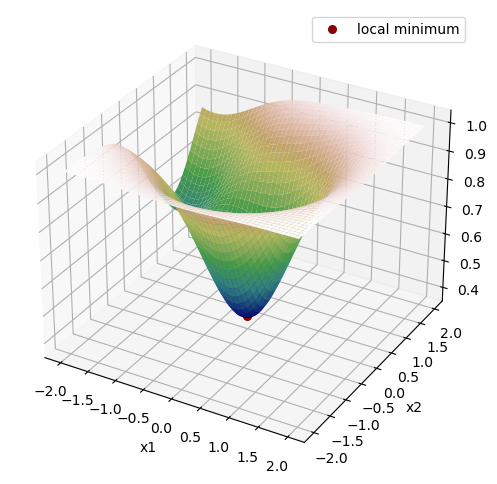

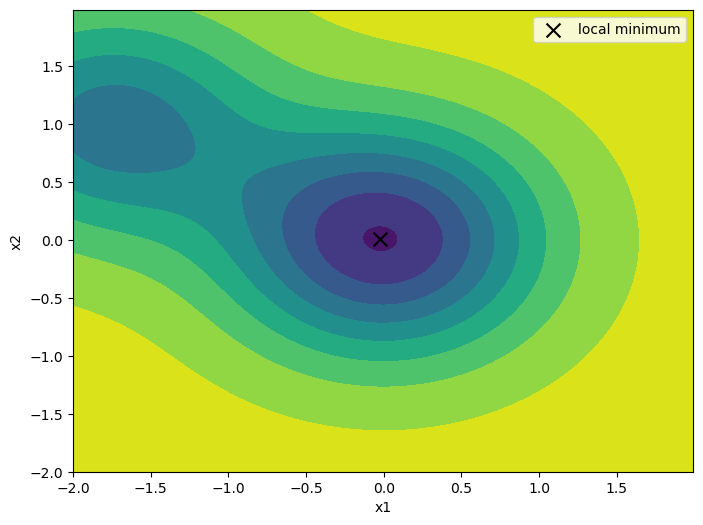

In [5]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
x1, x2 = np.meshgrid(x1, x2)
z = g(x1, x2)

minimum, x, it = GradientDescent.solve(g, gradient_g, EPS, 0.25, -2, -2, show_data=True);

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1, x2, z, cmap=cm.gist_earth)
ax.scatter(x[0], x[1], minimum, c='darkred', s=30, label='local minimum')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

fig, ax = plt.subplots()

ax.tricontourf(x1.flatten(), x2.flatten(), z.flatten())
ax.scatter(x[0], x[1], color='black', marker='x', s=100, label='local minimum')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()



Dobór parametru beta jest ważną częścią testowania tego algorytmu, ponieważ ma duży wpływ na to w jakim czasie (w ilu iteracjach) uda się odnaleźć minimum lokalne.<br/><br/>
Żeby odnaleźć optymalną betę przeprowadziłem eksperyment, który dla zakresu działających dla danej funkcji wartości parametrów beta porównał ich ilości iteracji.
Każda wartość z zadanego przedziału została przetestowana na ilość iteracji dla losowej próby 200 punktów startowych, z których wyciągnięta została mediana w celu wyeliminowania ewentualnych anomalii. Wynik eksperymentu dla funkcji $f(x)$ przedstawia nam, że funkcja ta ma jeden optymalny parametr beta, i dla każdej kolejnej wartości oddalającej się od niego, funkcja ta potrzebuje coraz wiecej iteracji. Wygląda na symetryczną względem swojego minimum.

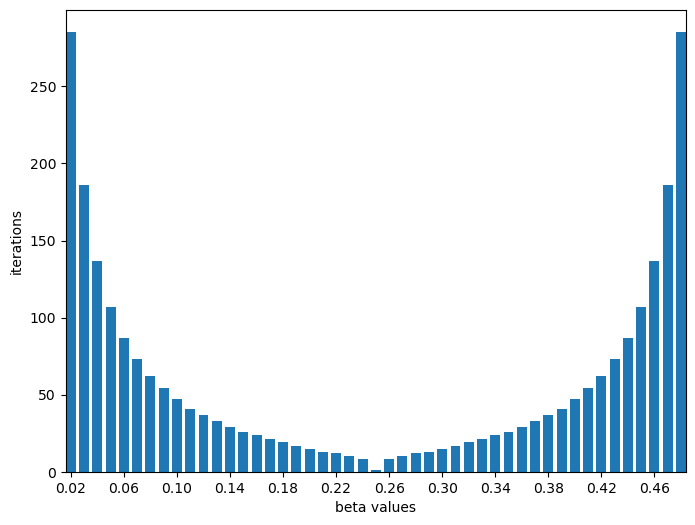

In [6]:
beta_set_start_f = 0.02; beta_set_stop_f = 0.48; beta_set_step_f = 0.01
beta_set_f = np.arange(beta_set_start_f, beta_set_stop_f + beta_set_step_f, beta_set_step_f)
x_random_set_f = np.random.uniform(-100, 100, 200)

results_f = [[GradientDescent.solve(f, gradient_f, EPS, beta, x) for beta in beta_set_f] for x in x_random_set_f]
iterations_beta_set_f = np.transpose([[value[2] for value in x_set] for x_set in results_f])
iterations_beta_median_f = np.median(iterations_beta_set_f, axis=1)

plt.bar(beta_set_f, iterations_beta_median_f, width=0.0075)
plt.xlim(beta_set_start_f-0.0075/2, beta_set_stop_f+0.0075/2)
plt.xticks(beta_set_f[::4])
plt.xlabel('beta values')
plt.ylabel('iterations')

plt.show()


Jak można zauważyć na wykresie poniżej, dla naszej zadanej funkcji kwadratowej $f(x)$ wynik jest bardzo zadowalający. Dla losowych 50 punktów ze stosunkowo dużego zakresu (8 rzędów wielkości większego niż przy eskperymencie z szukania optymalnej bety) minimum zostało znalezione w jednej iteracji dla każdej próby.

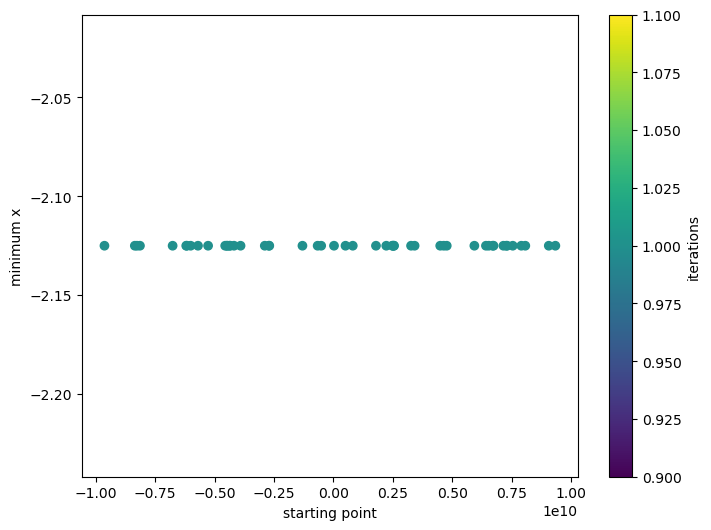

In [7]:
optimal_beta_f = round(beta_set_f[np.argmin(iterations_beta_median_f)], 2)

start_point_random_set_f = np.random.uniform(-10000000000, 10000000000, 50)

results_f = [GradientDescent.solve(f, gradient_f, EPS, optimal_beta_f, x) for x in start_point_random_set_f]

minimum_set, x_set, iterations = zip(*results_f)

plt.scatter(start_point_random_set_f, minimum_set, c=iterations)
plt.colorbar(label='iterations')
plt.xlabel('starting point')
plt.ylabel('minimum x')

plt.show()


Aby przedstawić te zależność dokładniej zrobiłem heatmapę, dzięki której można zobaczyć w pełni jak mają się do siebie odpowiednio wpływy parametru beta i punktu startowego. Heatmapa wygląda na symetryczną względem osi $y=0.25$, czyli swojej optymalnej wartości, i tak będę ją analizował. Wpływ parametru beta na ilość iteracji jest o wiele bardziej wyraźniejszy i widać że ma większe znaczenie, natomiast możemy wyróżnić też miejsca gdzie punkt startowy także ma widoczne znaczenie. Takim obszarem jest punkt startowy w otoczeniu punktu $0$, czyli blisko minimum tej funkcji ($x=-0.75$), można na nim zobaczyć zmniejszoną ilość iteracji w porównaniu do punktów spoza tego otoczenia. Punkt startowy ma także duże znaczenie dla najbardziej oddalonych od optymalnej wartości parametru beta, czyli na przedziałach $(0.02, 0.05)$ oraz $(0.45, 0.48)$, widoczny jest wtedy znaczny wzrost ilości iteracji wraz z oddalaniem się od punktu startowego.

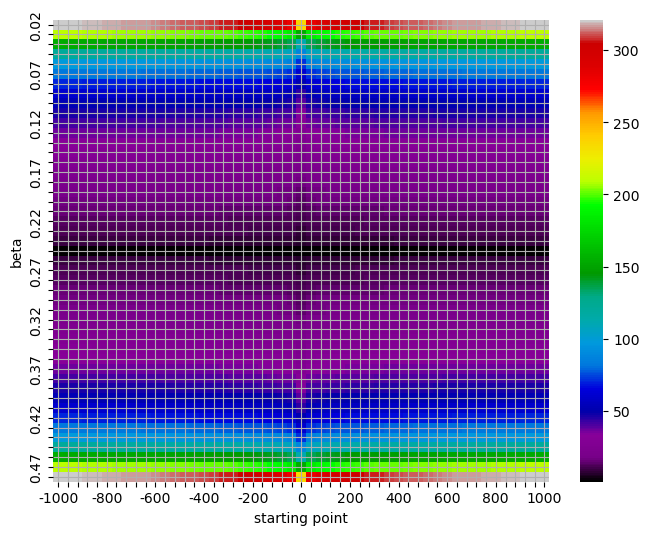

In [8]:
x_set_f = np.arange(-1000, 1001, 40)
beta_set_f = np.arange(0.02, 0.49, 0.01)
iterations_heatmap_data = [[GradientDescent.solve(f, gradient_f, EPS, beta, x)[2] for x in x_set_f] for beta in beta_set_f]
x_labels = ['' if index % 5 else x for index, x in enumerate(x_set_f)]
y_labels = ['' if index % 5 else np.round(y, 2) for index, y in enumerate(beta_set_f)]
heatmap = sns.heatmap(iterations_heatmap_data, cmap='nipy_spectral', yticklabels=y_labels, xticklabels=x_labels)
heatmap.set_ylabel('beta')
heatmap.set_xlabel('starting point')
heatmap.grid(True)


Do przeprowadzenia tego eksperymentu na funkcji $g(x)$, przedział doboru punktów startowych został dobrany w taki sposób, aby punkt startowy znajdował się w otoczeniu jedngo z dwóch przedstawionych na wykresie minimum, żeby uniknąć wejścia na miejsca w których funkcja się wypłaszcza (ma bardzo małe nachylenie). W tym przypadku żadna z wartości parametru nie dawała takich wyników jak w przypadku jednowymiarowej funkcji $f(x)$, aczkolwiek optymalne wartości są także dobrze widoczne.

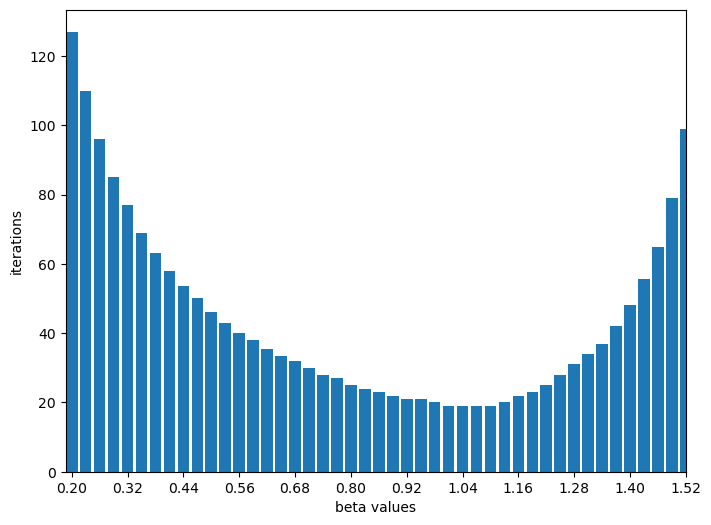

In [9]:
beta_set_start_g = 0.2; beta_set_stop_g = 1.5; beta_set_step_g = 0.03
beta_set_g = np.arange(beta_set_start_g, beta_set_stop_g + beta_set_step_g, beta_set_step_g)
x_random_set_g = np.random.uniform(-2.5, 2.5, (400, 2))

results_g = [[(GradientDescent.solve(g, gradient_g, EPS, beta, x1, x2)) for beta in beta_set_g] for x1, x2 in x_random_set_g]
iterations_beta_set_g = np.transpose([[value[2] for value in x_set] for x_set in results_g])
iterations_beta_median_g = np.median(iterations_beta_set_g, axis=1)

plt.bar(beta_set_g, iterations_beta_median_g, width=0.025)
plt.xlim(beta_set_start_g-0.025/2, beta_set_stop_g+0.025/2)
plt.xticks(beta_set_g[::4])
plt.xlabel('beta values')
plt.ylabel('iterations')

plt.show()

Sytuacja dla funkcji $g(x)$ nie jest podobna do tej dla funkcji $f(x)$. Na wykresie można zauważyć, że większość punktów zbiega do minimum lokalnego bądź globalnego, natomiast punkt startowy ma już tutaj duże znaczenie na ilość iteracji, a iteracje dla najbardziej oddalonych (lecz ciągle w otoczeniu) od obu minimum sięgają rzędu $1e6$. Problem pojawia się przy jeszcze dalszych punktach startowych, czyli w miejscu w którym funkcja się wypłaszcza. W wyniku bardzo małego nachylenia funkcji, metoda stwierdza że znalazła minimum. Jest to problem implementacji, przyjęcia błędu do warunku stopu, ponieważ funkcja ta nigdy nie jest płaska.

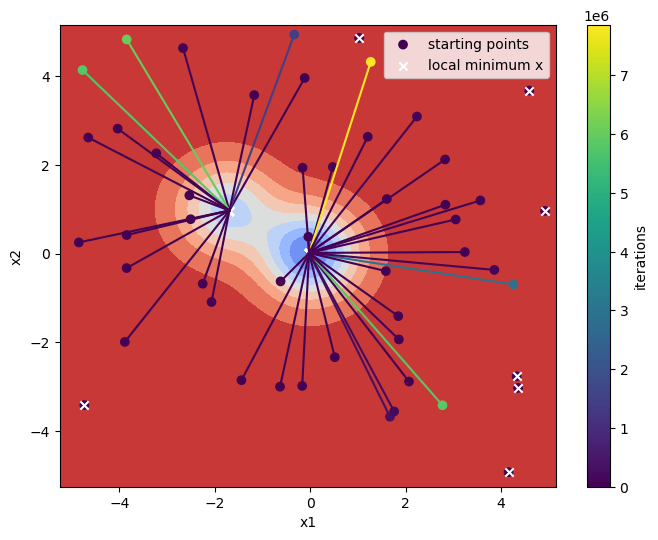

In [10]:
x1 = np.arange(-5.25, 5.25, 0.1)
x2 = np.arange(-5.25, 5.25, 0.1)
x1, x2 = np.meshgrid(x1, x2)
z = g(x1, x2)

plt.tricontourf(x1.flatten(), x2.flatten(), z.flatten(), cmap='coolwarm')

optimal_beta_g = round(beta_set_g[np.argmin(iterations_beta_median_g)], 2)

start_point_random_set_g = np.random.uniform(-5, 5, (50, 2))

results_g = [GradientDescent.solve(g, gradient_g, EPS, optimal_beta_g, x1, x2) for x1, x2 in start_point_random_set_g]

minimum_set, x_set, iterations = zip(*results_g)

start_point_random_set_g_T = np.transpose(start_point_random_set_g)
x_set_T = np.transpose(x_set)
max_iterations = max(iterations)
for i in range(len(iterations)):
    plt.plot([start_point_random_set_g_T[0][i], x_set_T[0][i]], [start_point_random_set_g_T[1][i], x_set_T[1][i]], c=plt.cm.viridis(iterations[i]/max_iterations))

plt.scatter(start_point_random_set_g_T[0], start_point_random_set_g_T[1], c=iterations, label='starting points')
plt.colorbar(label='iterations')
plt.scatter(x_set_T[0], x_set_T[1], c='white', marker='x', label='local minimum x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')

plt.show()

### Wnioski końcowe
Przedstawiona implementacja przeszukiwania metodą gradientu prostego umożliwia nam znalezienie minimum w stosunkowo niewielkiej ilości iteracji, natomiast nie we wszystkich przypadkach. Najlepiej radzi sobie z nieskomplikowanymi funkcjami które mają jedno minimum oraz nie są płaskie bądź z bardzo małym nachyleniem, jednakże dla funkcji wielowymiarowych bądź takich które posiadają więcej niż jedno minimum, metoda ta także w spełni swoje zadanie w konkretnym otoczeniu. Ważną częścią używania tego algorytmu jest dobór odpowiedniej wartości parametru beta, warto skupić się na tej części, ponieważ eksperymenty pokazały jak duże znaczenie ma to na końcowe wyniki.